<a href="https://colab.research.google.com/github/ladyj-dev/Alcohol_ETL_Project/blob/main/Wine_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [2]:
# create pd dataframe from aws bucket
url = "https://winedata150k.s3.us-east-2.amazonaws.com/winemag-data_first150k.csv"
wine_df = pd.read_csv(url)
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
# explore shape of data (rows,columns)
wine_df.shape

(150930, 11)

In [4]:
# what are the column names(features)
wine_df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [5]:
# drop unnecessary columns
wine_df.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
# confirm column was droped
wine_df.columns


Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [7]:
# explore dtypes of each column, need points and price to be numbers
wine_df.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [8]:
# what are the value counts for each column(looking for missing data)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [9]:
# drop rows that are missing the country
wine_df.dropna(subset=["country"],inplace=True)
wine_df.count(0)


country        150925
description    150925
designation    105190
points         150925
price          137230
province       150925
region_1       125870
region_2        60953
variety        150925
winery         150925
dtype: int64

In [10]:
# rename designation to name of wine
wine_df = wine_df.rename(columns={"designation": "name"})
wine_df.head(5)

,country,description,name,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [11]:
wine_df.columns

Index(['country', 'description', 'name', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [12]:
# add new feature - points per $(points/price)
wine_df["points_per_$"] = wine_df["points"] / wine_df["price"]
wine_df.head()

,country,description,name,points,price,province,region_1,region_2,variety,winery,points_per_$
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0.408511
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,0.872727
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,1.066667
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1.476923
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,1.439394


In [13]:
# reorder columns for readability
columns_names = ['country','province','region_1','variety', 'winery','name', 'points', 'price', 'points_per_$', 'description']
wine_df = wine_df.reindex(columns=columns_names)
wine_df.head(5)

,country,province,region_1,variety,winery,name,points,price,points_per_$,description
0,US,California,Napa Valley,Cabernet Sauvignon,Heitz,Martha's Vineyard,96,235.0,0.408511,This tremendous 100% varietal wine hails from ...
1,Spain,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,Carodorum Selección Especial Reserva,96,110.0,0.872727,"Ripe aromas of fig, blackberry and cassis are ..."
2,US,California,Knights Valley,Sauvignon Blanc,Macauley,Special Selected Late Harvest,96,90.0,1.066667,Mac Watson honors the memory of a wine once ma...
3,US,Oregon,Willamette Valley,Pinot Noir,Ponzi,Reserve,96,65.0,1.476923,"This spent 20 months in 30% new French oak, an..."
4,France,Provence,Bandol,Provence red blend,Domaine de la Bégude,La Brûlade,95,66.0,1.439394,"This is the top wine from La Bégude, named aft..."


In [14]:
# explore value counts of country
wine_df["country"].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [15]:
# filter on countries with at least 1000 wines
wine_df = wine_df[wine_df.groupby("country")["country"].transform("size") >= 1000]
wine_df["country"].value_counts()

US              62397
Italy           23478
France          21098
Spain            8268
Chile            5816
Argentina        5631
Portugal         5322
Australia        4957
New Zealand      3320
Austria          3057
Germany          2452
South Africa     2258
Name: country, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaedf69080>,
      dtype=object)

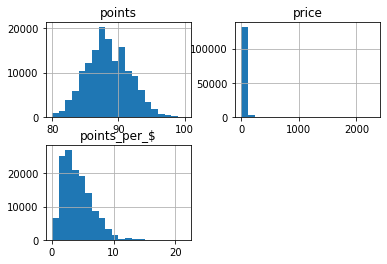

In [16]:
# examine df via histogram
wine_df.hist(bins=20)


In [17]:
wine_df.dtypes

country          object
province         object
region_1         object
variety          object
winery           object
name             object
points            int64
price           float64
points_per_$    float64
description      object
dtype: object

Text(0.5, 1.0, 'Price')

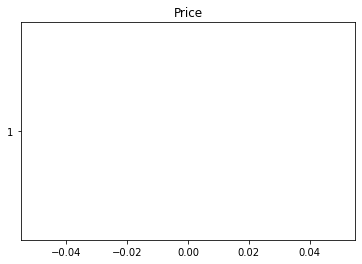

In [20]:
# create a boxplot of price
blue_circle = dict(markerfacecolor="blue", marker="o")
plt.boxplot(wine_df["price"], vert=False, flierprops=blue_circle)
plt.title("Price")

In [21]:
# what are the descriptive statistics for points and price?
wine_df.describe()

,points,price,points_per_$
count,148054.000000,134428.000000,134428.000000
mean,87.915862,33.273403,4.095942
std,3.225906,36.494229,2.387088
min,80.000000,4.000000,0.043043
25%,86.000000,16.000000,2.250000
50%,88.000000,24.000000,3.600000
75%,90.000000,40.000000,5.500000
max,100.000000,2300.000000,21.500000


In [23]:
# remove outliers from price
# quartiles = np.percentile(wine_df['price'], [25, 50, 75])
# mu = quartiles[1]
# sig = 0.74 * (quartiles[2] - quartiles[0])
# wine_df_reduced = wine_df.query('(price > @mu - 5 * @sig) & (price < @mu + 5 * @sig)')


In [25]:
# wine_df_reduced

In [26]:
# reduce catergories to 6 hierachal
# red/white/rose 
# varieties of red; variety of white
# varieties of unknown high price vs

SyntaxError: ignored

In [27]:
# let's look closer at price for outliers using matplotlib pyplot
# blue_circle = dict(markerfacecolor='blue', marker='o')
# plt.title('Price')
# plt.boxplot(wine_df['price'], vert=False, flierprops=blue_circle)


In [28]:
# hierchy layers big - circle wineries red/white/sparkling, rose tokenizer creates 

In [29]:
# Let's use a robust sigma-clipping operation (see p.175 Python Data Science handbook) technique to identify "outliers"
# outliers for this purpose are identified as those that are more than 5 sigma from the mean are considered as outliers


In [ ]:
# quartiles = np.percentile(wine_df['price'], [25, 50, 75])
# mu = quartiles[1]
# sig = 0.74 * (quartiles[2] - quartiles[0])
# wine_df_reduced = wine_df.query('(price > @mu - 5 * @sig) & (price < @mu + 5 * @sig)')
